In [11]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn import preprocessing
from scipy import stats
from itertools import combinations

from news_vec.utils import read_json_gz_lines

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [13]:
df = pd.DataFrame(list(tqdm(read_json_gz_lines('../data/clf-ova-ts-acc.json/'))))

145600it [00:00, 432498.94it/s]


In [14]:
df.head(10)

,acc,domain,window
0,0.646314,foxnews.com,43
1,0.775875,sputniknews.com,29
2,0.658972,huffingtonpost.com,47
3,0.638868,washingtonpost.com,62
4,0.658228,dailycaller.com,16
5,0.669397,dailycaller.com,83
6,0.765450,bloomberg.com,1
7,0.690246,wsj.com,29
8,0.660462,breitbart.com,1
9,0.693969,wsj.com,47


foxnews.com
LinregressResult(slope=0.0005047245072559325, intercept=0.6232357000460105, rvalue=0.7010942899520987, pvalue=0.0, stderr=5.381908323175435e-06)


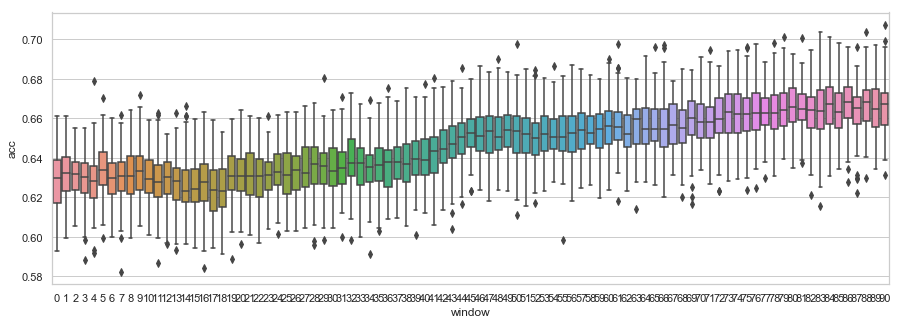

sputniknews.com
LinregressResult(slope=2.863056444816051e-05, intercept=0.7661164838360965, rvalue=0.05028361090938348, pvalue=1.5935818808680258e-06, stderr=5.9618459139136735e-06)


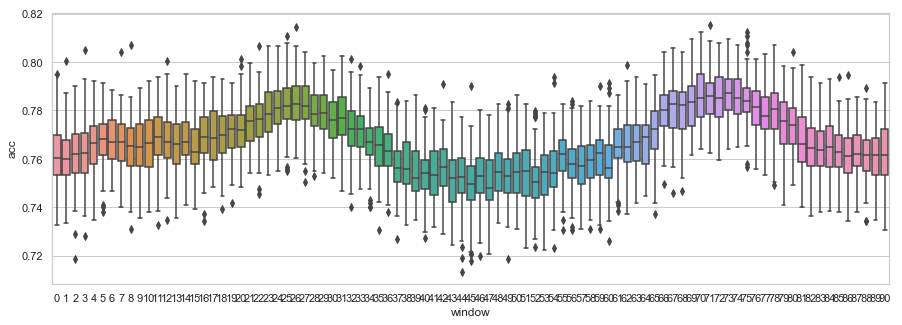

huffingtonpost.com
LinregressResult(slope=-0.000413732416596592, intercept=0.672140086632561, rvalue=-0.6182553699129314, pvalue=0.0, stderr=5.514278331899354e-06)


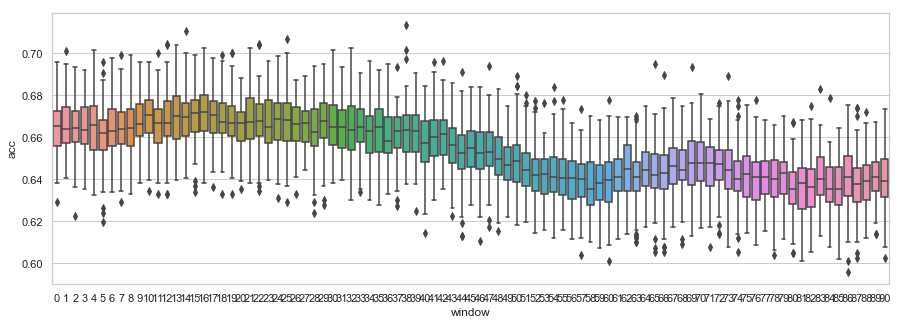

washingtonpost.com
LinregressResult(slope=6.690444262780693e-05, intercept=0.6316609793421882, rvalue=0.11051957893829618, pvalue=3.9397076089948905e-26, stderr=6.307744236837679e-06)


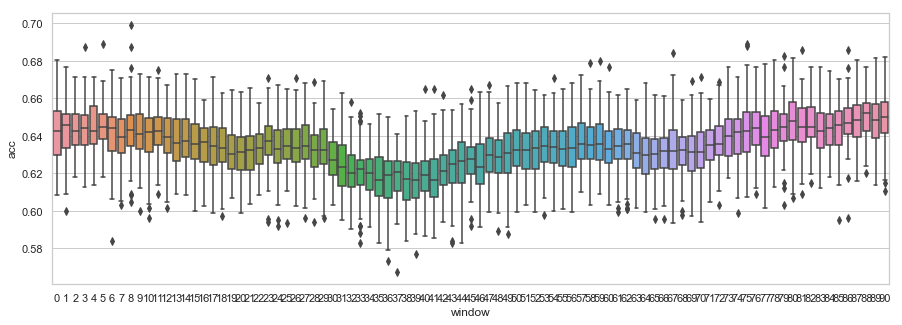

dailycaller.com
LinregressResult(slope=0.0001937577379248288, intercept=0.6475993764505255, rvalue=0.34099310062729105, pvalue=1.5245021533497246e-246, stderr=5.600138266300935e-06)


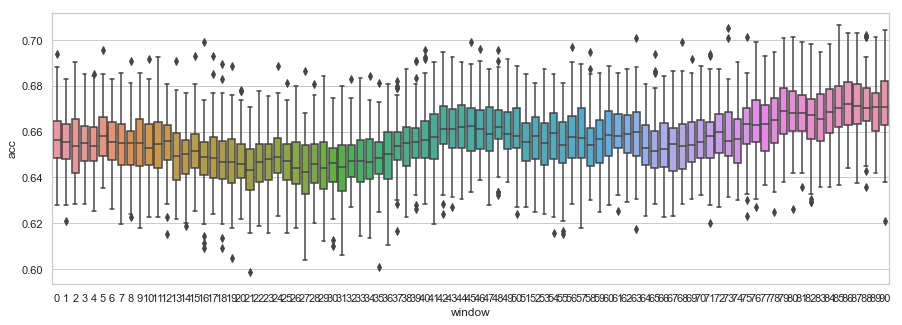

bloomberg.com
LinregressResult(slope=-4.682039284917979e-05, intercept=0.743226928902389, rvalue=-0.09781127520505965, pvalue=8.620990224100479e-21, stderr=4.994427430065522e-06)


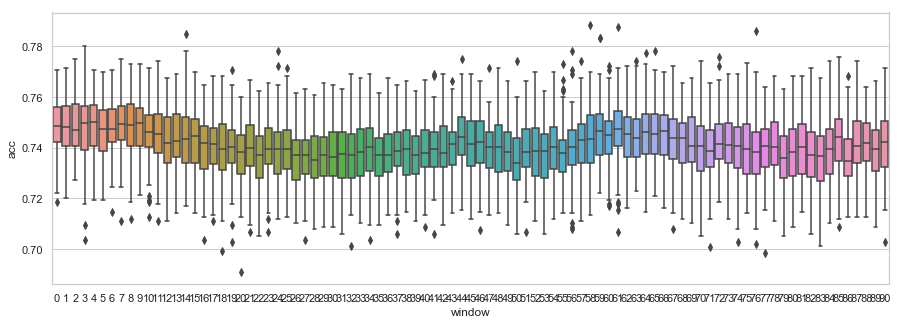

wsj.com
LinregressResult(slope=0.000175345204115305, intercept=0.6840275914367893, rvalue=0.3286423755463195, pvalue=4.001203310477332e-228, stderr=5.282972829400231e-06)


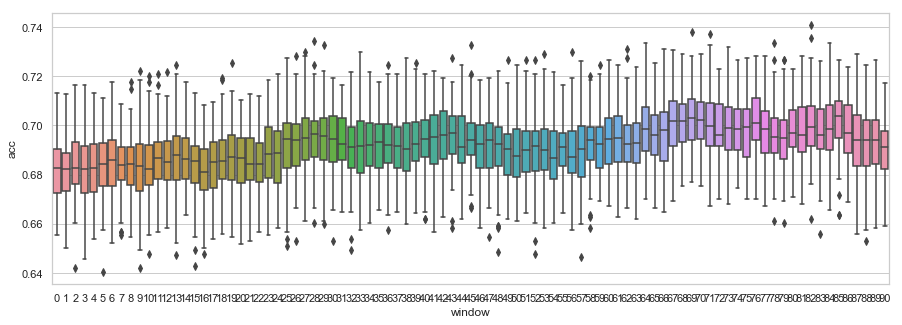

breitbart.com
LinregressResult(slope=2.5178530858416987e-05, intercept=0.687482088526756, rvalue=0.044299804383146436, pvalue=2.363791012319395e-05, stderr=5.952906302620452e-06)


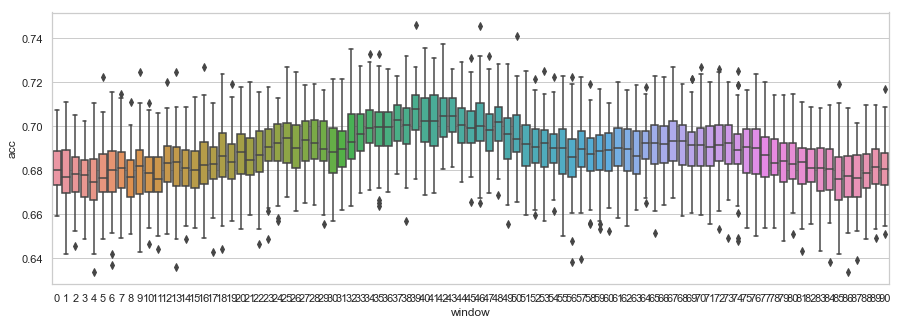

nytimes.com
LinregressResult(slope=-6.533448858098425e-05, intercept=0.6478013160828476, rvalue=-0.12532541933549882, pvalue=3.511051905105527e-33, stderr=5.422414096145917e-06)


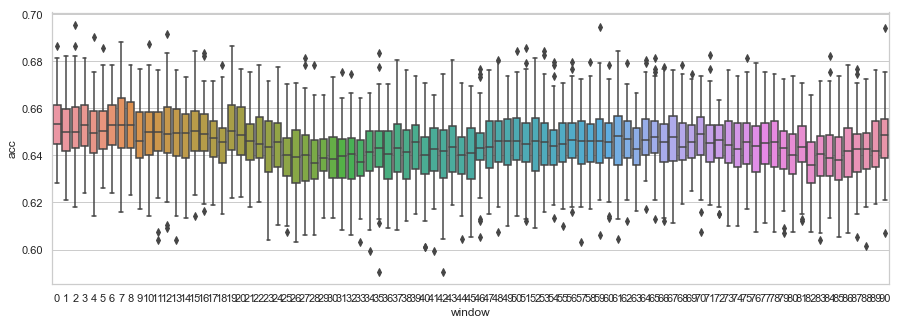

dailykos.com
LinregressResult(slope=-0.0004318517599267397, intercept=0.7489010625186813, rvalue=-0.6416203752468416, pvalue=0.0, stderr=5.4124214028408365e-06)


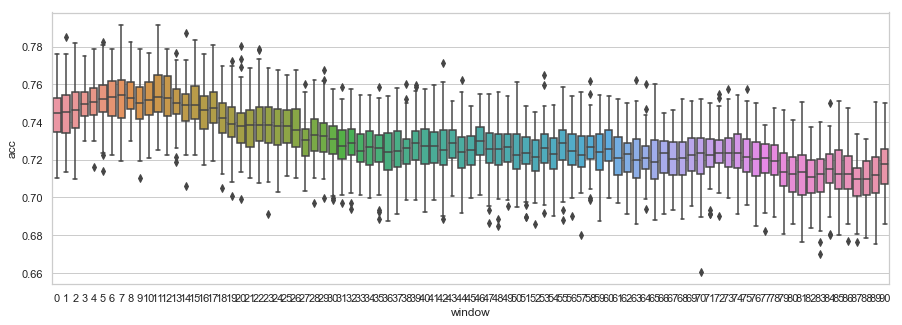

rt.com
LinregressResult(slope=5.386035596273286e-05, intercept=0.7385736409179408, rvalue=0.10885150693283127, pvalue=2.1561754168513006e-25, stderr=5.156719889171338e-06)


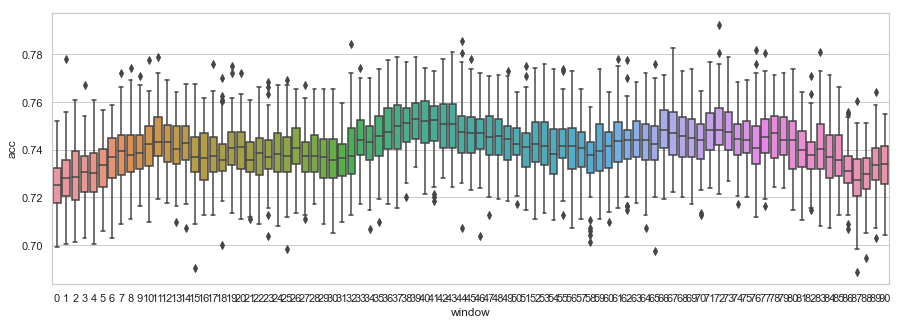

apnews.com
LinregressResult(slope=6.835999620162446e-05, intercept=0.6987106795401575, rvalue=0.13994156124374113, pvalue=5.020422736937717e-41, stderr=5.070930094321542e-06)


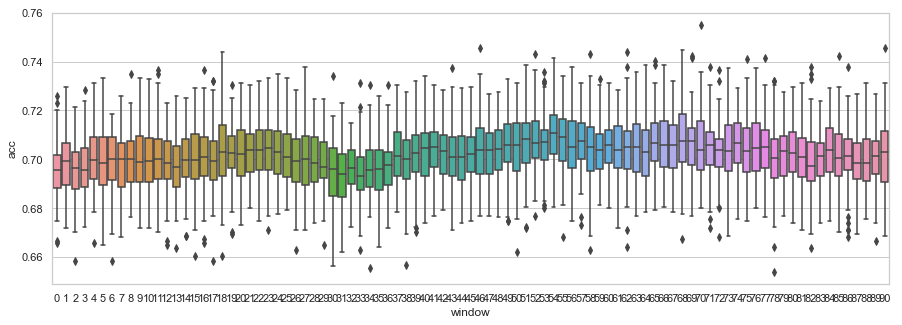

npr.org
LinregressResult(slope=-6.621117627806973e-05, intercept=0.6378971468599857, rvalue=-0.125432948863134, pvalue=3.0970552638431676e-33, stderr=5.4903884635810106e-06)


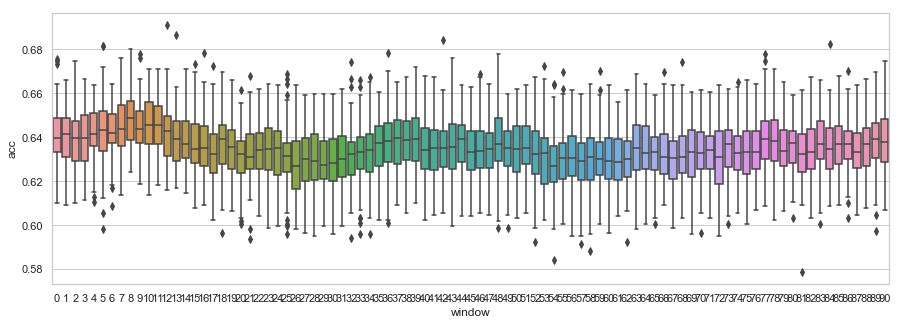

thehill.com
LinregressResult(slope=-0.0005116701220544671, intercept=0.7366372099375059, rvalue=-0.723901190961643, pvalue=0.0, stderr=5.112416785436515e-06)


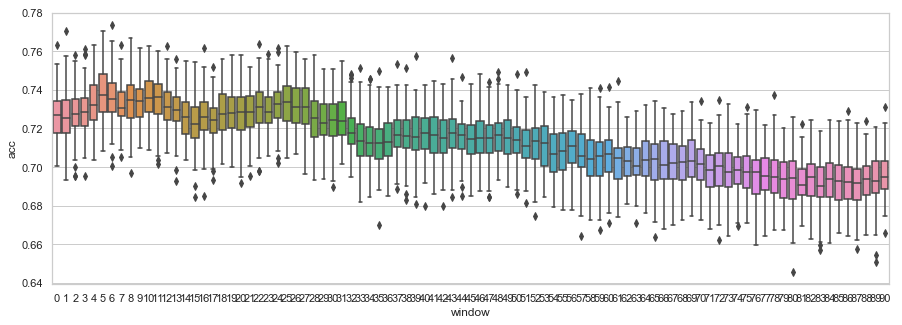

cnn.com
LinregressResult(slope=-0.0002643996209428254, intercept=0.6069140611182513, rvalue=-0.4368819166194006, pvalue=0.0, stderr=5.707344263767977e-06)


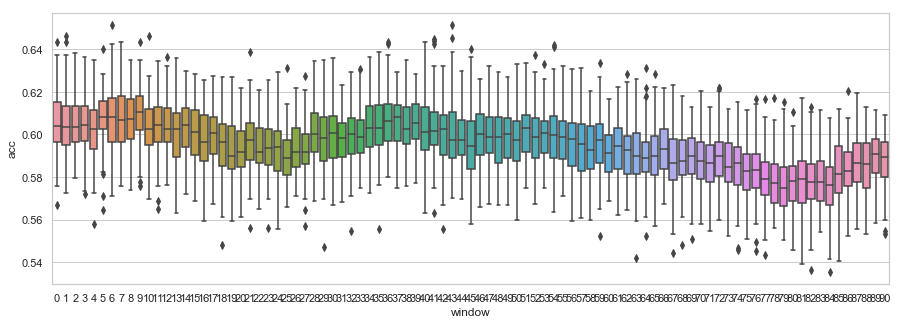

buzzfeed.com
LinregressResult(slope=0.0004139141154562827, intercept=0.7825568813066651, rvalue=0.5989095989624178, pvalue=0.0, stderr=5.802418996281577e-06)


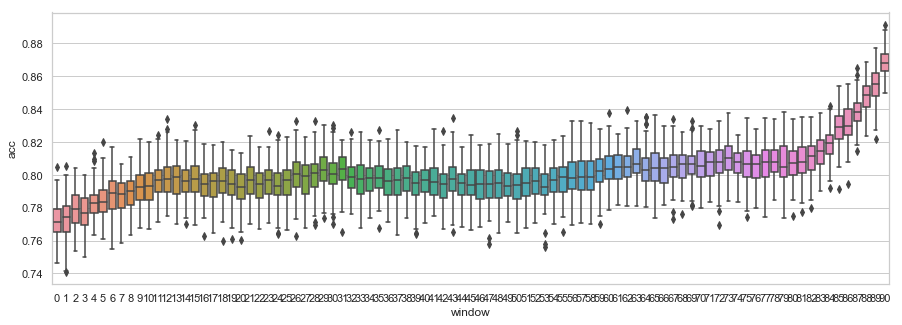

In [21]:
for d in df.domain.unique():
    
    pdf = df[df.domain==d].sort_values('window')
    
    print(d)
    print(stats.linregress(pdf.window, pdf.acc))
    
    plt.figure(figsize=(15,5))
    sns.boxplot(x='window', y='acc', data=pdf)
    plt.show()